# Machine Learning Utils - Regression example: Houses dataset (Kaggle)

### 0 - Setup

In [10]:
from ml_utils import *

In [25]:
dtf = pd.read_csv("data_houses.csv")
dtf = dtf[dtf.columns.tolist()[0:10]+dtf.columns.tolist()[-5:]]
dtf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,12,2008,WD,Normal,250000


len dtf: 1460
Id --> Nas: 0 (0.0%)
    # possible pk
MSSubClass --> Nas: 0 (0.0%)
MSZoning --> Nas: 0 (0.0%)
LotFrontage --> Nas: 259 (17.7%)
LotArea --> Nas: 0 (0.0%)
Street --> Nas: 0 (0.0%)
Alley --> Nas: 1369 (93.8%)
LotShape --> Nas: 0 (0.0%)
LandContour --> Nas: 0 (0.0%)
Utilities --> Nas: 0 (0.0%)
MoSold --> Nas: 0 (0.0%)
YrSold --> Nas: 0 (0.0%)
SaleType --> Nas: 0 (0.0%)
SaleCondition --> Nas: 0 (0.0%)
SalePrice --> Nas: 0 (0.0%)


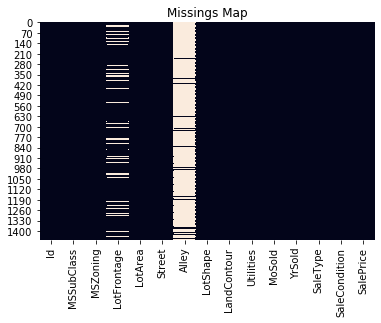

In [26]:
check_Nas(dtf, plot="map")

### 1 - Data Analysis

###### Group variables by info
- pk: PassengerId, Name
- y: Survived
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

In [27]:
features = []

###### Target Variable

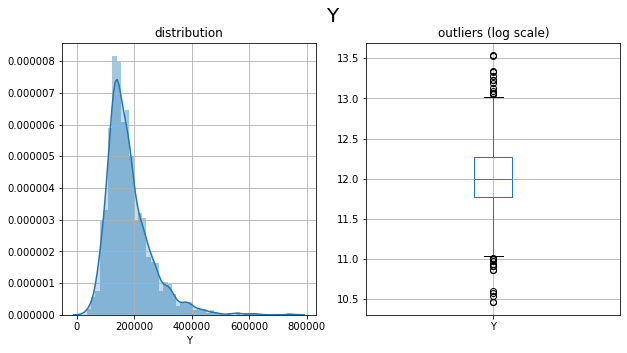

In [28]:
dtf = dtf.rename(columns={"SalePrice":"Y"})

freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

In [ ]:
# Population mean: 38% of the passengers survived

###### 1.1 

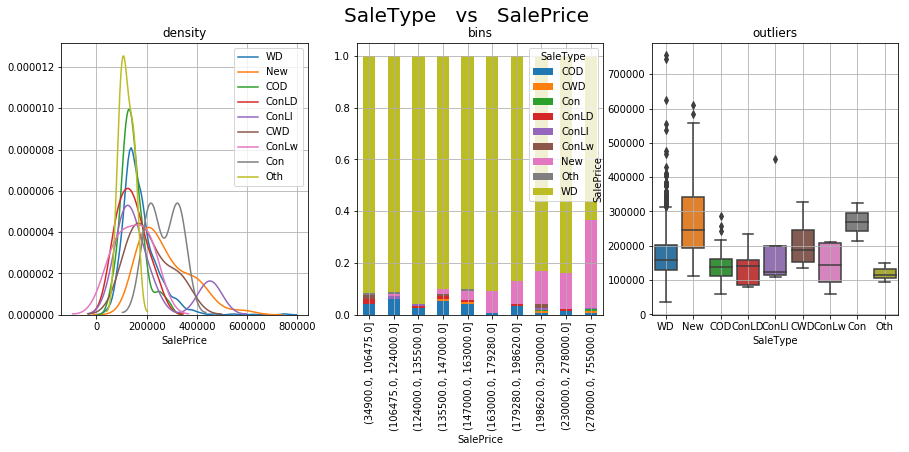

In [23]:
bivariate_plot(dtf, x="SaleType", y="SalePrice", figsize=(15,5))

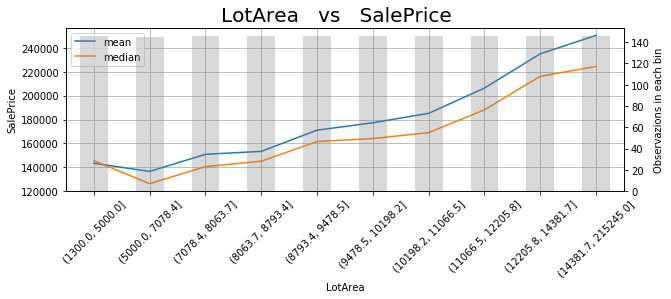

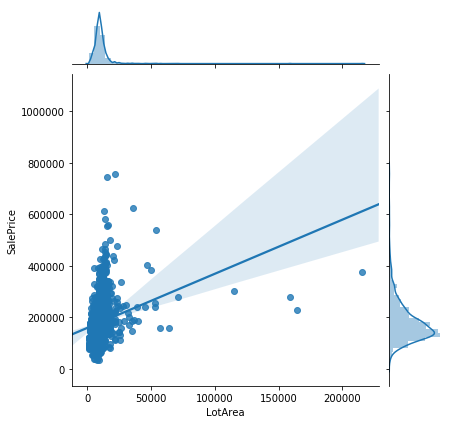

In [17]:
bivariate_plot(dtf, x="LotArea", y="SalePrice", figsize=(10,3))